In [2]:
import torch 
from matplotlib import pyplot as plt
import numpy as np
import cv2


In [3]:
import uuid
import os
import time

In [3]:
Images_Path=os.path.join('data','images')
labels=['awake','drowsy']
number_imgs=20

In [8]:
cap=cv2.VideoCapture(0)
for label in labels:
    print("Collecting images for {}".format(labels))
    time.sleep(5)
    
    for img_num in range(number_imgs):
        print("Collecting images for {} , image number {}".format(label,img_num))
        
        ret,frame = cap.read()
        
        imgname=os.path.join(Images_Path,label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname,frame)
        cv2.imshow('Image Collection',frame)
        time.sleep(2)
        
        if cv2.waitKey(10)& 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [4]:
img = "C://Users//jessy//PycharmProjects//Detector//data//images//awake.a02f1460-503a-11ef-b095-b46bfc6b878e.jpg"
img_2 = "C://Users//jessy//PycharmProjects//Detector//test_data//drowsy (19).jpg"

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp6/weights/last.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\jessy/.cache\torch\hub\master.zip
YOLOv5  2024-8-2 Python-3.12.4 torch-2.4.0+cu118 CUDA:0 (NVIDIA GeForce MX150, 2048MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [8]:
results=model(img)
results.print()

C:\Users\jessy/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 480x640 1 awake
Speed: 189.7ms pre-process, 29.3ms inference, 122.0ms NMS per image at shape (1, 3, 480, 640)


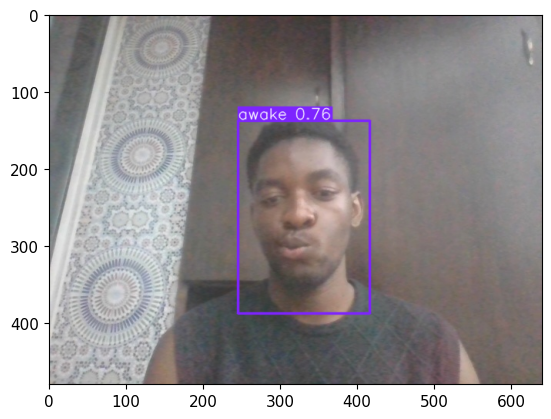

In [9]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\jessy/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\jessy/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\jessy/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\jessy/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\jessy/.cache\torch\hub\ultralytics_yolov5_master\models

KeyboardInterrupt: 